In [1]:
from ib_insync import *
import pandas as pd
import matplotlib.pyplot as plt
import ta
from datetime import datetime, timedelta

In [2]:
util.startLoop()

In [ ]:
# 📡 Conexión a Interactive Brokers
ib = IB()
ib.connect('127.0.0.1', 7497, clientId=1)


<IB connected to 127.0.0.1:7497 clientId=1>

Peer closed connection.


In [4]:
# 📥 Obtener datos históricos desde IB
def get_data(symbol):
    contract = Stock(symbol, 'SMART', 'USD')
    ib.qualifyContracts(contract)
    bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='200 D',
        barSizeSetting='1 day',
        whatToShow='TRADES',
        useRTH=True,
        formatDate=1
    )
    df = util.df(bars)
    df.set_index('date', inplace=True)
    return df


In [5]:
# 📊 Cálculo de indicadores técnicos
def add_indicators(df):
    df['SMA50'] = ta.trend.sma_indicator(df['close'], window=50)
    df['SMA200'] = ta.trend.sma_indicator(df['close'], window=200)
    df['RSI'] = ta.momentum.RSIIndicator(df['close'], window=14).rsi()
    macd = ta.trend.MACD(df['close'])
    df['MACD'] = macd.macd()
    df['MACD_signal'] = macd.macd_signal()
    return df

In [6]:
# 📉 Graficar indicadores
def plot_indicators(df, symbol):
    plt.figure(figsize=(14, 6))
    plt.plot(df['close'], label='Close')
    plt.plot(df['SMA50'], label='SMA 50', linestyle='--')
    plt.plot(df['SMA200'], label='SMA 200', linestyle=':')
    plt.title(f'{symbol} - Precio con SMA')
    plt.xticks(rotation = 50)
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(14, 3))
    plt.plot(df['RSI'], label='RSI', color='orange')
    plt.axhline(30, color='red', linestyle='--')
    plt.axhline(70, color='green', linestyle='--')
    plt.title(f'{symbol} - RSI')
    plt.legend()
    plt.grid()
    plt.show()

In [7]:
# ✅ Detectar señales técnicas
def detectar_senales(df, symbol):
    senales = []

    if df['RSI'].iloc[-1] < 30:
        senales.append("RSI < 30 (sobrevendido)")

    if df['MACD'].iloc[-1] > df['MACD_signal'].iloc[-1] and df['MACD'].iloc[-2] < df['MACD_signal'].iloc[-2]:
        senales.append("MACD cruzando al alza")

    if df['close'].iloc[-1] > df['SMA50'].iloc[-1] and df['close'].iloc[-2] < df['SMA50'].iloc[-2]:
        senales.append("Precio cruzó la SMA 50")

    if senales:
        print(f"\n📊 Señales para {symbol}:")
        for s in senales:
            print("-", s)

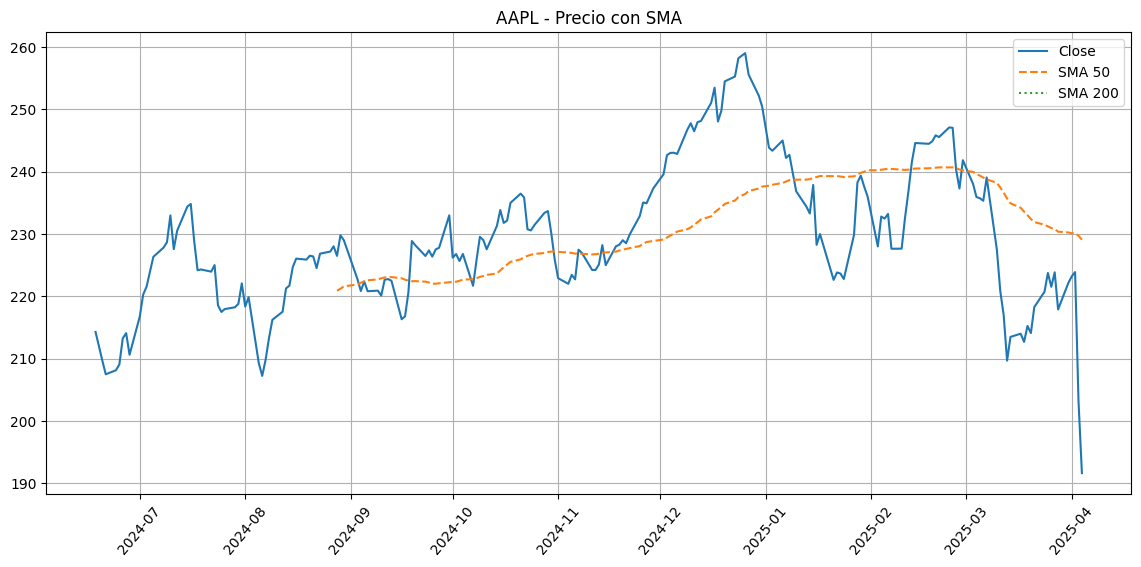

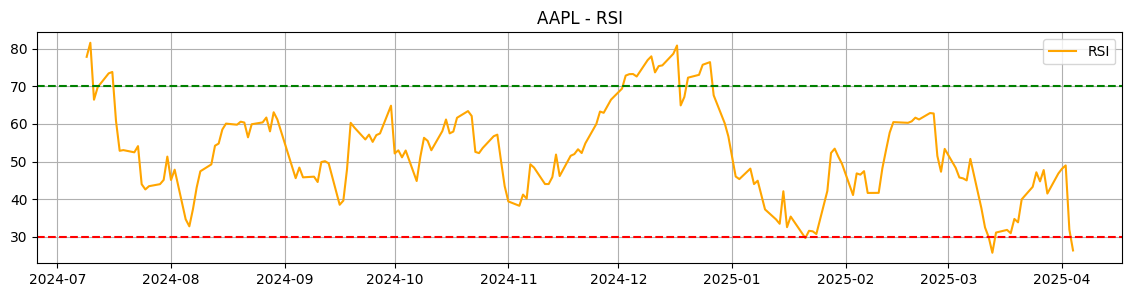


📊 Señales para AAPL:
- RSI < 30 (sobrevendido)


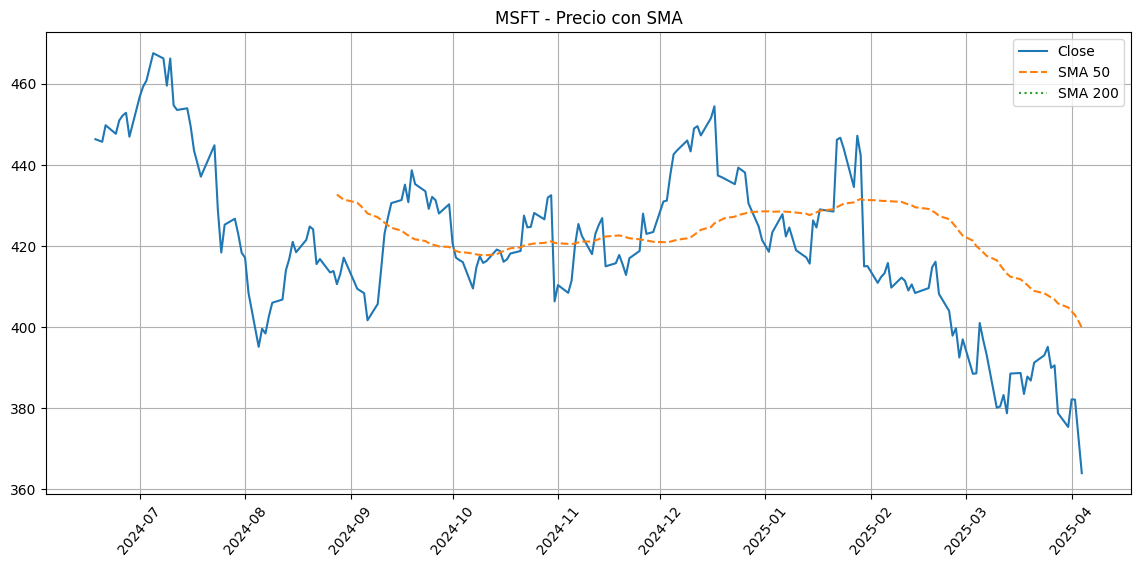

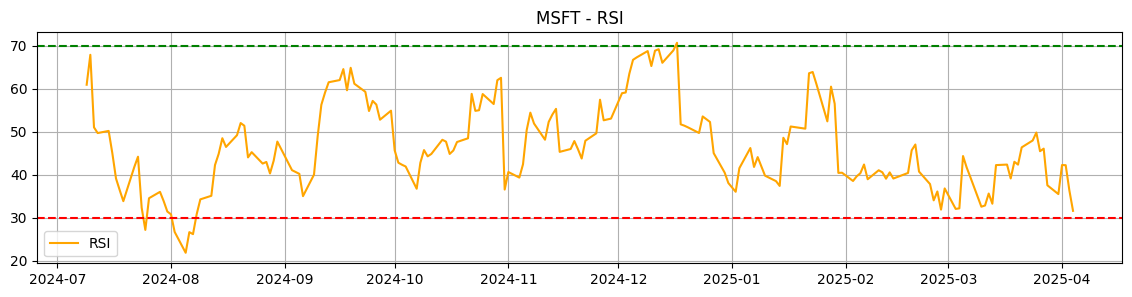

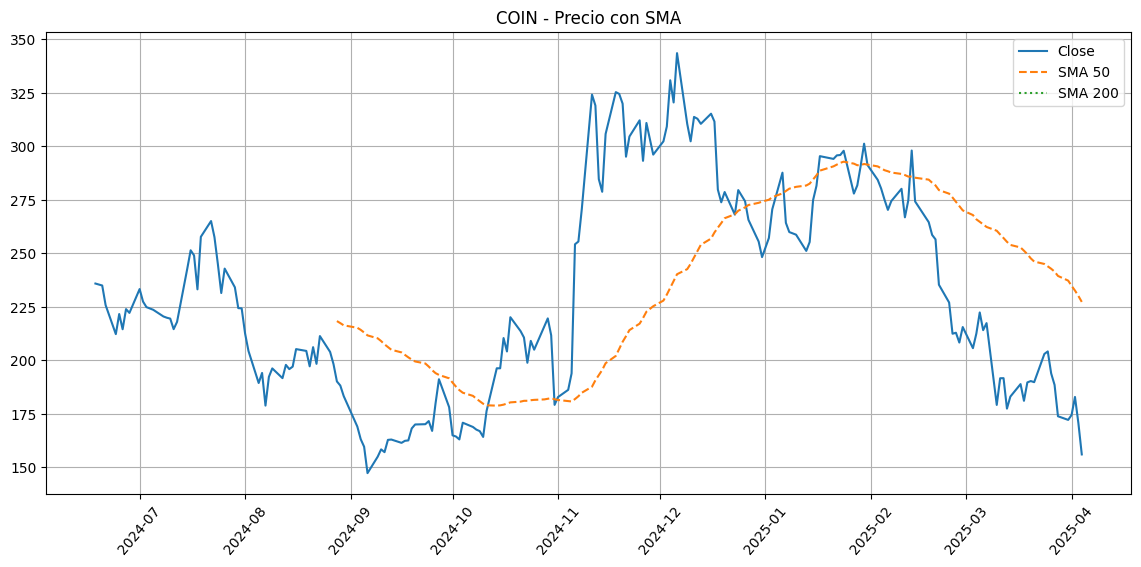

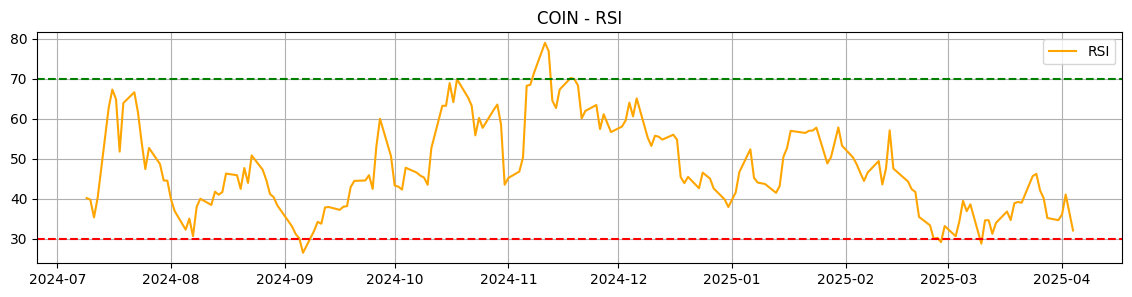

In [8]:
# 🚀 Ejecutar para una lista de acciones
symbols = ['AAPL', 'MSFT', 'COIN']
for symbol in symbols:
    df = get_data(symbol)
    df = add_indicators(df)
    plot_indicators(df, symbol)
    detectar_senales(df, symbol)
